# Diabetes Prediction using Logistic Regression

In this project we are going to predict if a person have diabetes using Logistic Regression.

Import libraries

In [1]:
pip install -r ./requirements.txt | grep -v 'Requirement already satisfied';

  Using cached scikit_learn-1.4.0-1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.12.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.4.0-1-cp39-cp39-macosx_10_9_x86_64.whl (11.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.12.0-cp39-cp39-macosx_10_9_x86_64.whl (38.9 MB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

/var/folders/xj/j8r00dd95wn7lh34b83jtgg80000gp/T/ipykernel_10782/2821049787.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Read the data. The data was obtained from Kagle.

https://www.kaggle.com/datasets/vikasukani/diabetes-data-set

All people in the dataset are women. In the Outcome column, 1 means the person was diagnosed with diabetes, 0 means the woman do not have diabetes.

## Explore

In [4]:
df=pd.read_csv("/Users/nathaly/Portfolio/PortfolioDataScientist/Project3/diabetes-dataset.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


There are no null values. In the outcome column is the information about if a person has or not diabetes. The number 1 is for a person who have diabetes and a number 0 is for a person who doesn't have.

We are going to analyze the multicollinearity because our model is going to be lineal. Therefore, we are going to analyze the correlation between variables.

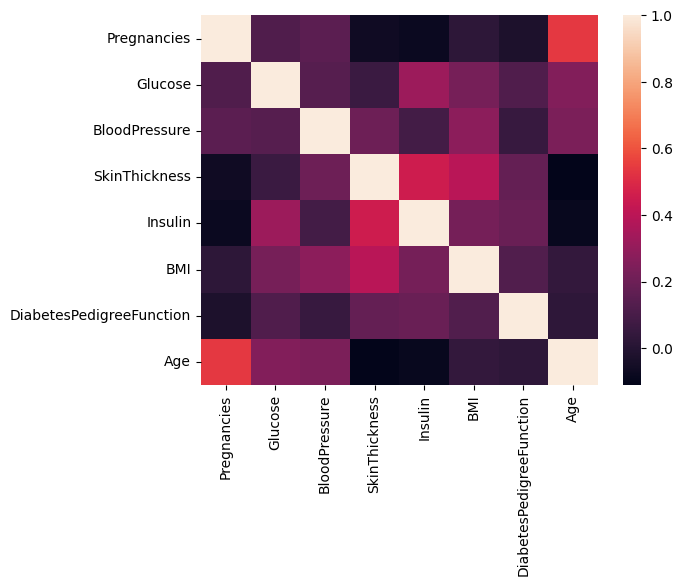

In [7]:
correlation = df.drop(columns = "Outcome").corr()
sns.heatmap(correlation);

There is correlation between pregnancies and age, but is not strong.

Now we can see the relation between the variable Glucose with the Outcome with a box plot.

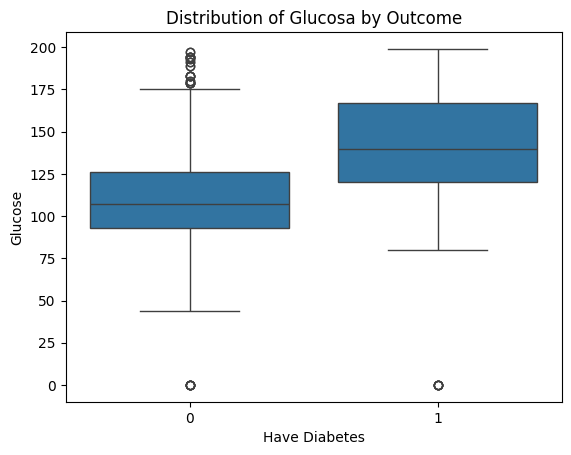

In [8]:
# Create boxplot
sns.boxplot(x="Outcome", y="Glucose", data=df )
# Label axes
plt.xlabel("Have Diabetes")
plt.ylabel("Glucose")
plt.title("Distribution of Glucosa by Outcome");

We can see that when people have diabetes, the glucose is higher than when they don't have diabetes.

Now it is necessary to see the balance between the two classes. 

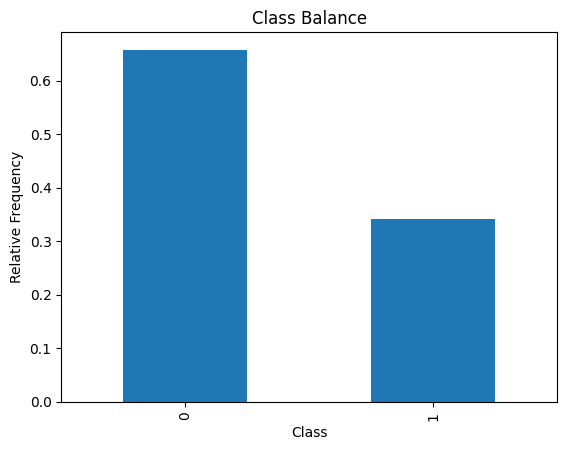

In [9]:
df["Outcome"].value_counts(normalize = True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

We can work with this balance. Now we are going to keep the values of the majority class and the minority class.

In [10]:
majority_class_prop, minority_class_prop = df["Outcome"].value_counts(normalize = True)
print(majority_class_prop, minority_class_prop)

0.658 0.342


We are going to make a pivot table to see if women with more pregnancies are more likely to suffer diabetes.

In [11]:
pregnancies_pivot = pd.pivot_table(
    df, index = "Pregnancies", values = "Outcome", aggfunc=np.mean
).sort_values(by = "Outcome")
pregnancies_pivot

/var/folders/xj/j8r00dd95wn7lh34b83jtgg80000gp/T/ipykernel_10782/773533482.py:1: FutureWarning: The provided callable <function mean at 0x11243f0d0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pregnancies_pivot = pd.pivot_table(


,Outcome
Pregnancies,
2,0.169014
1,0.221910
0,0.332226
6,0.335878
4,0.350785
3,0.358974
5,0.368794
10,0.407407
12,0.434783


We can see that the women with more than 7 pregnancies are more likely to have diabetes. We are going to plot a bar chart to analyze this information. In this bar chart, we are going to include the majority and minority classes.

''

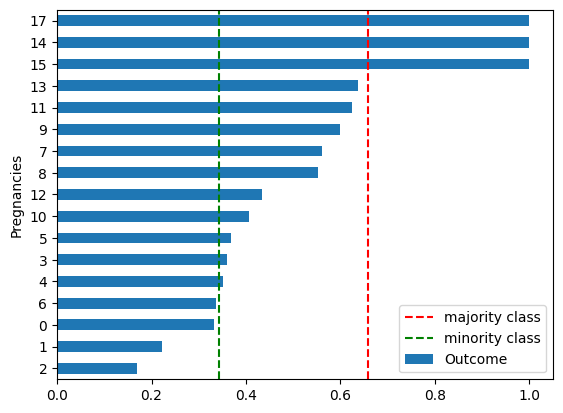

In [12]:
# Plot bar chart of `foundation_pivot`
pregnancies_pivot.plot(kind="barh", legend = None)
plt.axvline(
    majority_class_prop, linestyle = "--", color = "red", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle = "--", color = "green", label="minority class"
)
plt.legend(loc = "lower right")
;

We can see that women with 17, 14 and 15 pregnancies are with a much higher diagnosis of diabetes. In contrast, women with 1 or 2 pregnancies have a lower diagnosis of diabetes.

## Split

We are going to split the data frame in X and y and then we are going to use train test plit to obtain X train, X test, y train and y test.

In [13]:
target = "Outcome"
X = df.drop(columns=target)
y = df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model

Baseline

We calculate the baseline accuracy score for our model.

In [15]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.66


## Iterate

We build the model and fit the model.

In [16]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Evaluate

Now we evaluate the model. First, we calculate the training accuracy, then the test accuracy.

In [17]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.77
Test Accuracy: 0.79


We can see that both are higher than the baseline accuracy. 

## Communicate

We are going to print the first five predictions using the X train.

In [18]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.18863737 0.81136263]
 [0.93282567 0.06717433]
 [0.98261839 0.01738161]
 [0.60084392 0.39915608]
 [0.64030282 0.35969718]]


We obtain the features and coefficients of our model.

In [19]:
features=model.feature_names_in_
features


array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [20]:
importances = model.coef_[0]
importances

array([ 0.12177809,  0.03345373, -0.01046356,  0.00591654, -0.00174543,
        0.07978138,  0.66171   ,  0.01437861])

Finally, we calculate the odds ratios and we plot them.

In [21]:
odds_ratios = pd.Series(np.exp(importances), index = features).sort_values()
odds_ratios

BloodPressure               0.989591
Insulin                     0.998256
SkinThickness               1.005934
Age                         1.014482
Glucose                     1.034020
BMI                         1.083050
Pregnancies                 1.129503
DiabetesPedigreeFunction    1.938104
dtype: float64

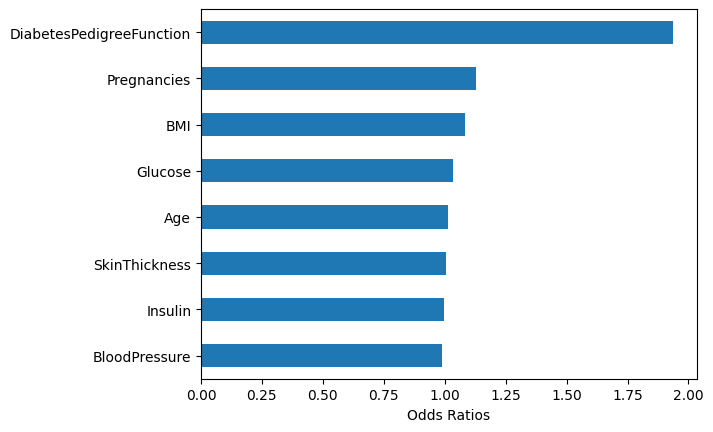

In [22]:
odds_ratios.plot(kind="barh")
plt.xlabel("Odds Ratios");

We can see that Diabetes Pedigree Function is the feature that affect more the model. 

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
Now we obtain our predictions with X_test and we calculate the accuracy score.

In [25]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.79


Finally, we plot the confussion matrix.

<Figure size 1100x1100 with 0 Axes>

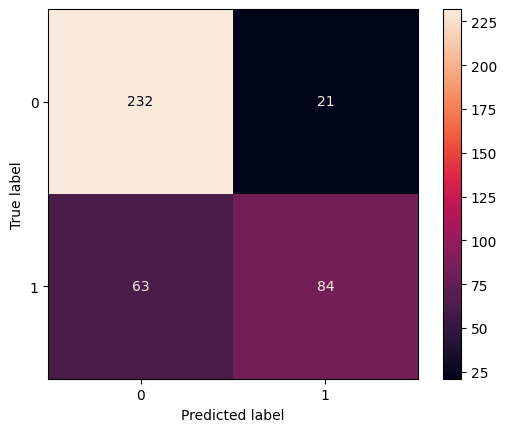

In [29]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='rocket')
plt.show()